In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import xarray.ufuncs as xu
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean as cm
import dask.array as da
import scipy.io
from scipy import signal
import os
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 63.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61712,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 63.20 GiB
Comm: tcp://127.0.0.1:61746,Total threads: 4
Dashboard: http://127.0.0.1:61748/status,Memory: 15.80 GiB
Nanny: tcp://127.0.0.1:61715,


In [2]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

Load Distance Miles, Convert to CSV

In [3]:
import scipy.io
mat = scipy.io.loadmat('alongshore_mi_lonlat_distmile_ALL.mat',struct_as_record=False,squeeze_me=True)

In [4]:
model_i = mat['model_i']-1
model_j = mat['model_j']-1
rm_lat = mat['model_lat']
rm_lon = mat['model_lon']
dist_mile =mat['dist_mile']

In [5]:
rm_df = pd.DataFrame(mat, columns=['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon']) #create dataframe for iloc capability

In [6]:
array = ([[dist_mile[61], model_i[61], model_j[61],rm_lon[61],rm_lat[61]],
        [dist_mile[111], model_i[111], model_j[111], rm_lon[111],rm_lat[111]],
        [dist_mile[161], model_i[161], model_j[161], rm_lon[161],rm_lat[161]],
        [dist_mile[216], model_i[216], model_j[216], rm_lon[216],rm_lat[216]],
        [dist_mile[308], model_i[308], model_j[308], rm_lon[308],rm_lat[308]],
        [dist_mile[414], model_i[414], model_j[414], rm_lon[414],rm_lat[414]],
        [dist_mile[486], model_i[486], model_j[486], rm_lon[486],rm_lat[486]],
        [dist_mile[558], model_i[558], model_j[558], rm_lon[558],rm_lat[558]],
        [dist_mile[711], model_i[711], model_j[711], rm_lon[711],rm_lat[711]],
        [dist_mile[877], model_i[877], model_j[877], rm_lon[877],rm_lat[877]],
        [dist_mile[977], model_i[977], model_j[977], rm_lon[977],rm_lat[977]],
        [dist_mile[1095], model_i[1095], model_j[1095], rm_lon[1095],rm_lat[1095]],
        [dist_mile[1210], model_i[1210], model_j[1210], rm_lon[1210],rm_lat[1210]]])
rm_df = pd.DataFrame(array, 
                     index = ['river_mile_1', 'river_mile_10', 'river_mile_20', 'river_mile_30', 'river_mile_40', 'river_mile_50', 'river_mile_60', 'river_mile_70', 'river_mile_80', 'river_mile_90', 'river_mile_100', 'river_mile_110', 'river_mile_120'],
                              columns=['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon'])
rm_df

,dist_mile,model_i,model_j,model_lat,model_lon
river_mile_1,0.137343,65,61,-75.057375,38.844426
river_mile_10,10.061386,80,111,-75.130076,38.980740
river_mile_20,19.991430,96,161,-75.211898,39.112142
river_mile_30,30.051648,104,216,-75.294151,39.219372
river_mile_40,39.974993,93,308,-75.421832,39.335900
river_mile_50,50.037004,48,414,-75.550294,39.444289
river_mile_60,59.974100,55,486,-75.557534,39.583847
river_mile_70,69.947750,57,558,-75.510660,39.704225
river_mile_80,80.024129,58,711,-75.396762,39.813707
river_mile_90,89.992165,71,877,-75.230973,39.859903


In [7]:
rm_df.to_csv(path_or_buf='river_mile_coords.csv', columns =['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon'], 
             header=True, index=True)

Load Station List

In [5]:
station_list = scipy.io.loadmat('station_list_v2.mat',struct_as_record=False,squeeze_me=True)

In [6]:
sl_df = pd.DataFrame(station_list, 
                     index = ['Newbold','Burlington','Bridesburg','Philadelphia', 'Marcus_Hook','Delaware_City','Reedy_Point','Ship_John_Shoal','Brandywine_Shoal_Light','Cape_May_NOAA','Lewes','Trenton','Trenton_Marine_Terminal','Pennypack_Creek','Riverton','Ben_Franklin_Bridge','Schuykill_River','Fort_Mifflin','Chester','Delaware_River_At_Memorial_Bridge','C&D_Canal','Reedy_Island','Reedy_Island_Jetty','Cape_May_USGS'],
                     columns=['lat', 'lon', 'mi', 'mj', 'station_ID', 'station_agency'])
sl_df

,lat,lon,mi,mj,station_ID,station_agency
Newbold,40.136667,74.751667,103,1277,8548989,NOAA
Burlington,40.080000,74.873333,75,1184,8539094,NOAA
Bridesburg,39.983333,75.075000,64,1039,8546252,NOAA
Philadelphia,39.933333,75.141667,47,987,8545240,NOAA
Marcus_Hook,39.811667,75.410000,45,701,8540433,NOAA
Delaware_City,39.581667,75.588333,30,485,8551762,NOAA
Reedy_Point,39.558333,75.573333,44,476,8551910,NOAA
Ship_John_Shoal,39.305000,75.375000,105,277,8537121,NOAA
Brandywine_Shoal_Light,38.986667,75.113333,86,110,8555889,NOAA
Cape_May_NOAA,38.968333,74.960000,110,78,8536110,NOAA


In [10]:
sl_df.to_csv(path_or_buf='station_list_coords.csv', columns =['lat', 'lon', 'mi', 'mj', 'station_ID', 'station_agency'], 
             header=True, index=True)

In [ ]:
def load_COAWST_model_run(url):
    ds = xr.open_dataset(url, chunks={'ocean_time':720})
    ds = xr.Dataset(ds, coords={'lon': (['eta_rho', 'xi_rho'], nc['lon_rho']),
                          'lat': (['eta_rho', 'xi_rho'], nc['lat_rho']),
                          's': nc['s_rho'])
    print(f'Size: {ds.nbytes / (-10**9)} GB')
    u = url.split('/')
    print(u[12])
    return ds

In [ ]:
def river_mile_timeseries():
    # read river mile coordinates csv
    river_mile_coords = pd.read_csv(river_mile_coords_filepath, index_col=0)
    
    # create array of river miles as points
    target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
    target_x = xr.DataArray(target_x,dims=["points"]) 
    target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
    target_y = xr.DataArray(target_y,dims=["points"]) 
    dist_mile = np.array(river_mile_coords.iloc[:,[0]].values).squeeze()
    dist_mile = xr.DataArray(dist_mile,dims=["points"]) 
    
    # select variable for timeseries along shore
    ds = ds[variable].isel(xi_rho=ds.lon,eta_rho=ds.lat) 
    
    # assign river mile distance as a new coordinate in dataset
    ds = ds.assign_coords({'dist_mile': dist_mile})
    
    # sort by river mile, subset values from 1st river mile
    salt = ds.sortby(ds.dist_mile).isel(s_rho=0).where(salt>0.5)
    
    # select salt variable
    salt = salt.salt
    print(f'Size: {salt.nbytes / (-10**9)} GB')
    
    # create new netcdf with subsetted data
    if write_location == 'S3':
        try: 
            s3.Object(s3_bucket, netcdf_path).load()
        except botocore.exceptions.ClientError as e:
            if e.response['Error']['Code'] == "404":
                salt.to_netcdf(netcdf_path)
                print('uploading to s3')
                s3_client.upload_file(s3_bucket, '01_fetch/out/' + netcdf_filename)
    else:
        if os.path.isfile(netcdf_path):
            print ("File exist")
        else:
        salt.to_netcdf(netcdf_path)
        
    # close original salt dataset; improves performance
    salt.close()

In [ ]:
def main():
    # import config
    with open("01_fetch/fetch_config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)['fetch_COAWST_model_run.py']
        
    # set up write location data outputs
    write_location = config['write_location']
    s3_client = utils.prep_write_location(write_location, config['aws_profile'])
    s3_bucket = config['s3_bucket']
        
    url = config['url']
    
    river_mile_coords_filepath = config['river_mile_coords_filepath']
    variable = config['variable']
    
    netcdf_filename = f"coawst_salt_{model_run}_{model_run_year}.nc"
    netcdf_path = os.path.join('.', '01_fetch', 'out', filename)
if __name__ == '__main__':
    main()

In [44]:
river_mile_coords

,dist_mile,model_i,model_j,model_lat,model_lon
river_mile_1,0.137343,65,61,-75.057375,38.844426
river_mile_10,10.061386,80,111,-75.130076,38.980740
river_mile_20,19.991430,96,161,-75.211898,39.112142
river_mile_30,30.051648,104,216,-75.294151,39.219372
river_mile_40,39.974993,93,308,-75.421832,39.335900
river_mile_50,50.037004,48,414,-75.550294,39.444289
river_mile_60,59.974100,55,486,-75.557534,39.583847
river_mile_70,69.947750,57,558,-75.510660,39.704225
river_mile_80,80.024129,58,711,-75.396762,39.813707
river_mile_90,89.992165,71,877,-75.230973,39.859903


In [16]:
river_mile_coords = pd.read_csv('01_fetch/src/river_mile_coords.csv', index_col=0 )
target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
target_x = xr.DataArray(target_x, dims=["eta_rho, xi_rho"]) 
target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
target_y = xr.DataArray(target_y,dims=["eta_rho, xi_rho"])

In [ ]:
dist_mile = np.array(river_mile_coords.iloc[:,[0]].values)
dist_mile = dist_mile.squeeze()
dist_mile = xr.DataArray(dist_mile,dims=['eta_rho', 'xi_rho']) #change to points
dist_mile = dist_mile.values
dist_mile

In [68]:
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00010.nc'
ds = xr.open_dataset(url, chunks={'ocean_time':1})
ds = xr.Dataset(ds, coords={'lon': (['eta_rho', 'xi_rho'], ds['lon_rho']),
                          'lat': (['eta_rho', 'xi_rho'], ds['lat_rho']),
                          's': ds['s_rho'][0]})
ds = xr.Dataset(ds)
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_rho: 1370, eta_u: 1370, eta_v: 1369, ocean_time: 720, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_rho: 184, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019...
    lon              (eta_rho, xi_rho) float64 -75.1 -75.1 ... -74.75 -74.75
    lat              (eta_rho, xi_rho) float64 38.58 38.58 38.58 ... 40.22 40.22
    s                float64 -0.9688
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 

In [69]:
salt = ds['salt'].isel(xi_rho=target_x,eta_rho=target_y) 
salt = ds['salt']
salt

<xarray.DataArray 'salt' (ocean_time: 720, s_rho: 16, eta_rho: 1370, xi_rho: 184)>
dask.array<open_dataset-6fa5aecf0f4924f9a570aa83ec52b2f5salt, shape=(720, 16, 1370, 184), dtype=float32, chunksize=(1, 16, 1370, 184), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 ... -0.09375 -0.03125
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    lon         (eta_rho, xi_rho) float64 -75.1 -75.1 -75.09 ... -74.75 -74.75
    lat         (eta_rho, xi_rho) float64 38.58 38.58 38.58 ... 40.22 40.22
    s           float64 -0.9688
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [ ]:
salt = salt.assign_coords({'dist_mile': dist_mile})
print(f'Size: {ds.nbytes / (-10**9)} GB')
salt

In [ ]:
salt = salt.where(salt>0.5)
salt = salt.isel(s_rho=0)
print(f'Size: {salt.nbytes / (10**9)} GB')
# salt.to_netcdf('salt_2019.nc')
salt

In [39]:
salt = salt.assign_coords({'dist_mile': dist_mile})
print(f'Size: {ds.nbytes / (-10**9)} GB')
salt

ValueError: cannot add coordinates with new dimensions to a DataArray

In [73]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

In [3]:
datadir = '/Users/tthompson/Documents/Projects/Estaury-Salt_Front/fetch/drb-estuary-salinity-ml/salt_2019.nc'
salt_local = xr.open_dataset(datadir, chunks={'ocean_time':1})
salt_local

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 13)
Coordinates:
    s_rho       float64 ...
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

In [90]:
salt_local.dist_mile.shape

(13,)

In [92]:
salt_local.salt[0].shape

(13,)

In [94]:
salt_local.salt[0].values

array([28.6546   , 28.317978 , 26.272503 , 22.20922  , 16.50933  ,
       10.538897 ,  5.9673276,  2.6319327,        nan,        nan,
              nan,        nan,        nan], dtype=float32)

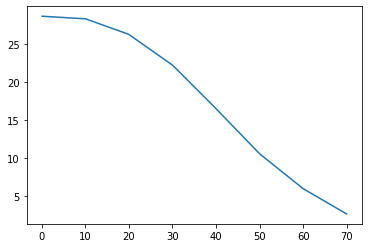

In [93]:
plt.plot(salt_local.dist_mile, salt_local.salt[0])

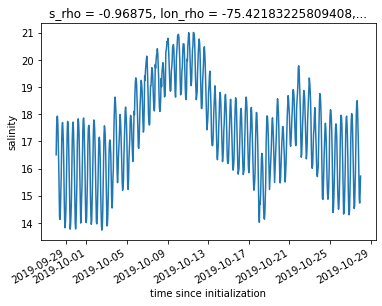

In [96]:
salt_local.salt.isel(points=4).plot()

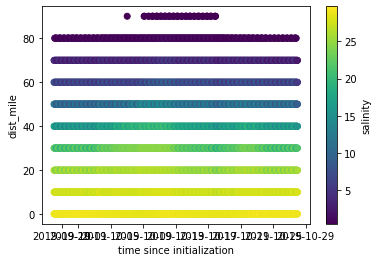

In [115]:
salt_local.plot.scatter('ocean_time','dist_mile','salt')

Text(0.5, 1.0, 'Hourly Salt Front August 2019')

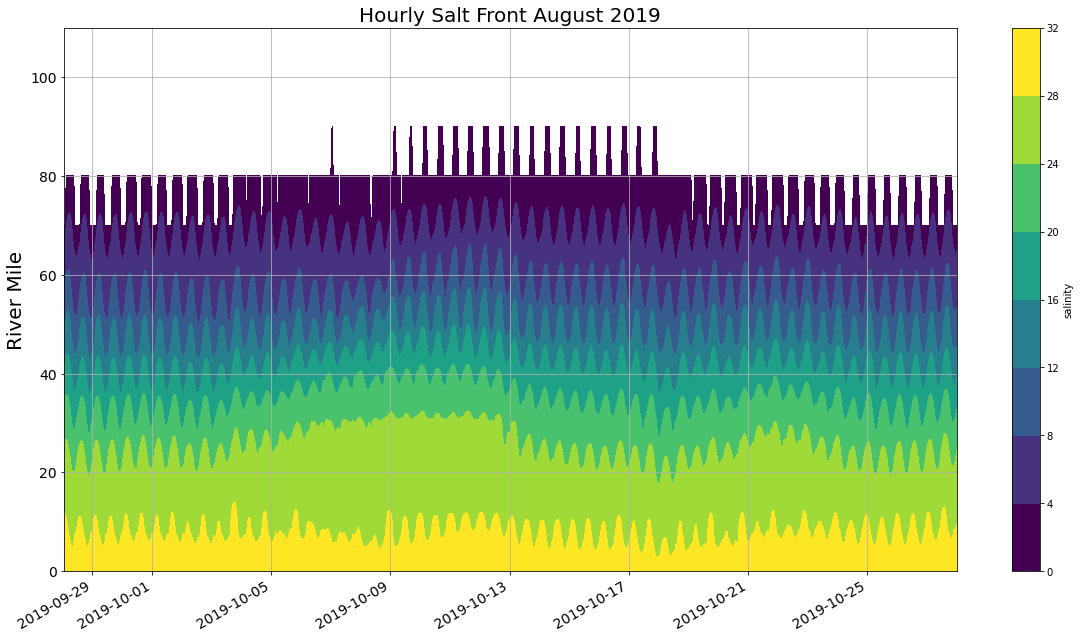

In [144]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local.salt.plot.contourf(x='ocean_time',y='dist_mile',add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [10]:
salt_local2 = salt_local.groupby('ocean_time.day').mean('ocean_time')
salt_local2

<xarray.Dataset>
Dimensions:    (day: 30, points: 13)
Coordinates:
    s_rho      float64 ...
    lon_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    dist_mile  (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * day        (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30
Dimensions without coordinates: points
Data variables:
    salt       (day, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

In [13]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

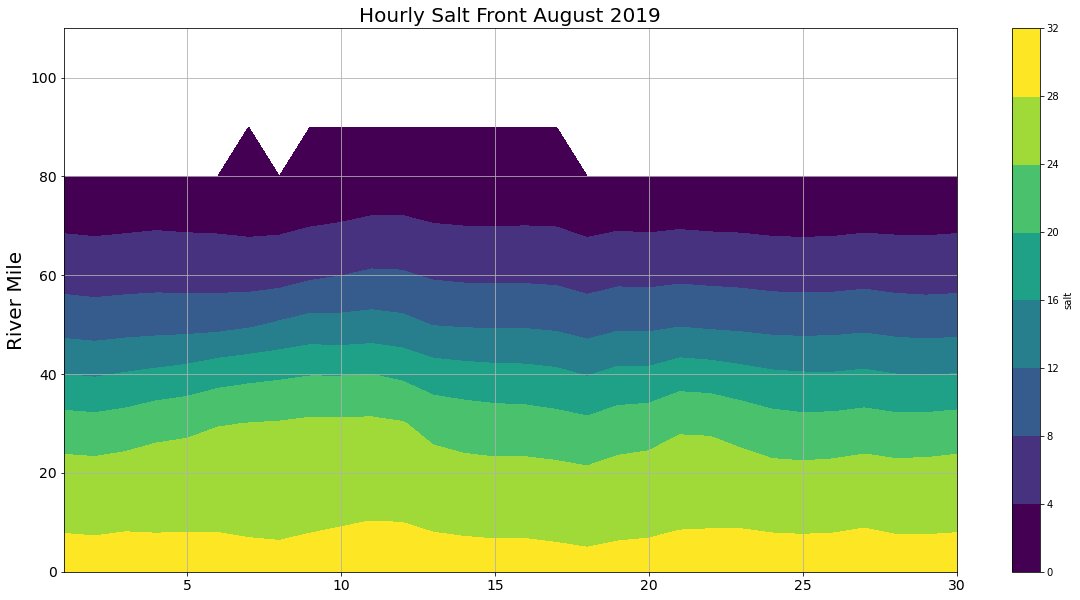

In [12]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local2.salt.plot.contourf(x='day',y='dist_mile',add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)
plt.savefig('hourly_salt_front_aug_19.png', dpi=400)

In [ ]:
salt_local.where(salt_local.values

In [ ]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local.plot.contourf(x,y,add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [ ]:
fig = plt.figure(figsize=(14.0,7.0))

axes1 = fig.add_subplot(1, 1, 1)

pc1 = axes1.pcolormesh(x, y, salt.values)
contours = axes1.contour(x, y, salt.values, colors='w')
axes1.clabel(contours, inline=2, fontsize=8)
plt.colorbar(pc1, ax=axes1)
axes1.set_ylabel('Lattitude')
axes1.set_xlabel('Longitude')
axes1.title.set_text('Salinity in DRB')
# plt.savefig('. DRB Salinity')

In [300]:
salt = salt.sortby(dist_mile)
salt = salt.where(salt>0.5)
print(f'Size: {salt.nbytes / (-10**9)} GB')
salt

Size: -3.744e-05 GB


<xarray.DataArray 'salt' (ocean_time: 720, points: 13)>
dask.array<where, shape=(720, 13), dtype=float32, chunksize=(1, 13), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 0.1373 10.06 19.99 30.05 ... 97.41 110.0 120.0
Dimensions without coordinates: points
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

IndexError: tuple index out of range

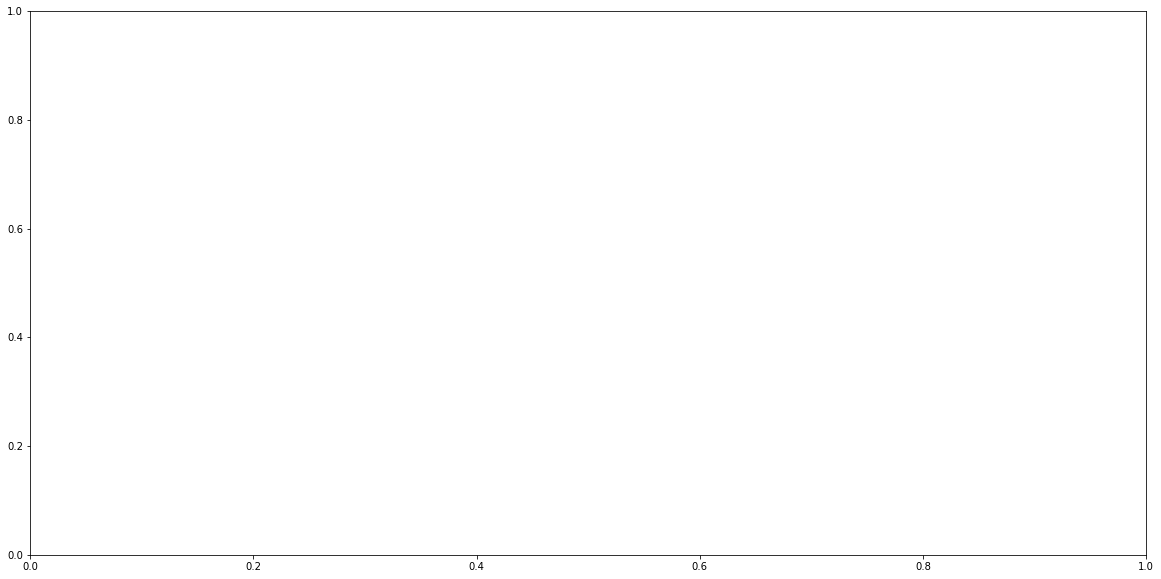

In [52]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = plt.contourf(x=salt_local.ocean_time, y=salt_local.dist_mile, add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
# plt.title("Hourly Salt Front August 2019",fontsize=20)

In [16]:
salt_local.dist_mile.values

array([  0.13734282,  10.06138569,  19.99142973,  30.05164758,
        39.97499267,  50.03700363,  59.97409988,  69.94775044,
        80.02412913,  89.99216472,  97.40694267, 110.00602579,
       120.02520124])

IndexError: tuple index out of range

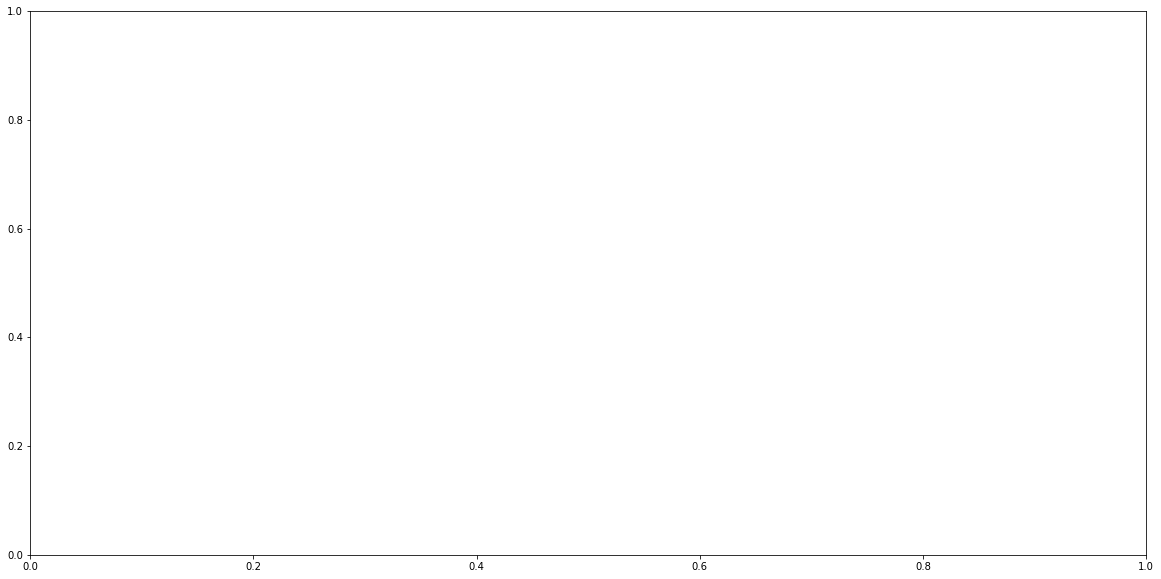

In [20]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = plt.contourf(x=salt_local.ocean_time.values,y=salt_local.dist_mile.values, z=salt_local.salt.values, add_colorbar=True,
                         vmin=0,vmax=32,levels=9,cmap=cm.cm.haline)

plt.plot(ds['ocean_time'],np.ones((8473,))*67,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*76,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*55,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*60,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*84,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*87,color='red',linestyle='dashed')

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [88]:
salt_local['ocean_time'].shape

(720,)

In [91]:
# plt.contourf(salt_local.ocean_time, salt_local.dist_mile, add_colorbar=True,
#                          vmin=0,vmax=32,levels=9,cmap=cm.cm.haline)
salt_local.plot.contourf(salt_local.ocean_time, salt_local.dist_mile, salt_local.salt)

TypeError: unhashable type: 'DataArray'

In [74]:
s

TypeError: __call__() takes 1 positional argument but 2 were given